In [1]:
from personalinking import collapse_data, txt_dict, usr_bow


usrsA = collapse_data(txt_dict("data/usersAFiltered.txt"))
usrsB = collapse_data(txt_dict("data/usersBFiltered.txt"))
postsA = usr_bow(txt_dict("data/postsAFiltered.txt"))
postsB = usr_bow(txt_dict("data/postsBFiltered.txt"))

In [2]:
from personalinking import gen_neg_pairs, gen_pos_pairs


X_pos = gen_pos_pairs("data/16_9_matches_j.txt", postsA, postsB, usrsA, usrsB) 
Y_pos = [1 for i in X_pos]
X_neg = gen_neg_pairs("data/16_9_matches_j.txt", postsA, postsB, usrsA, usrsB)
Y_neg = [0 for i in X_neg]

X = X_pos + X_neg
Y = Y_pos + Y_neg



In [3]:
import numpy as np

X = np.asarray(X)

In [4]:
from sklearn.utils import shuffle

X, Y= shuffle(X, Y)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

classifier = RandomForestClassifier()
cv = 5
scores = cross_val_score(classifier, X[:, :], Y, cv=cv)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

classifier = RandomForestClassifier()
cv = 5
scores = cross_val_score(classifier, X[:, :], Y, cv=cv)

# Feature Importances


In [7]:
classifier.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

<Container object of 29 artists>

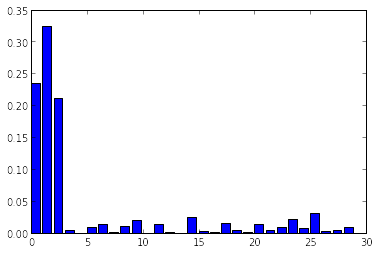

In [8]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.bar( range(len(classifier.feature_importances_)),classifier.feature_importances_,)

In [9]:
classifier.fit(X[: , 3:], Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

<Container object of 26 artists>

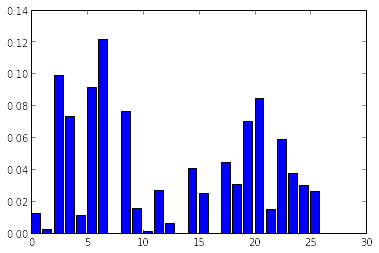

In [10]:
plt.bar( range(len(classifier.feature_importances_)),classifier.feature_importances_,)